# Problem 3: Open Network Simulation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

nodes = ['o', 'a', 'b', 'c', 'd']
n = len(nodes)

# Transition rates (Lambda)
Lambda = np.array([
    [0.0, 1.0, 1.0, 0.0, 0.0],
    [0.0, 0.0, 0.25, 0.25, 0.5],
    [0.0, 0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0] 
])

# Service rates (omega)
w = np.sum(Lambda, axis=1)
w[-1] = 1.75 # given in problem for node d

# Routing matrix P
P = np.zeros((n, n))
for i in range(n):
    if w[i] > 0:
        P[i] = Lambda[i] / w[i]

print("Service rates w:", w)
print("Routing P:\n", P)

Service rates w: [2.   1.   1.   1.   1.75]
Routing P:
 [[0.   0.5  0.5  0.   0.  ]
 [0.   0.   0.25 0.25 0.5 ]
 [0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   0.  ]]


### Part a) Proportional Rate Simulation
Node $i$ processes particles at rate $\omega_i N_i(t)$.

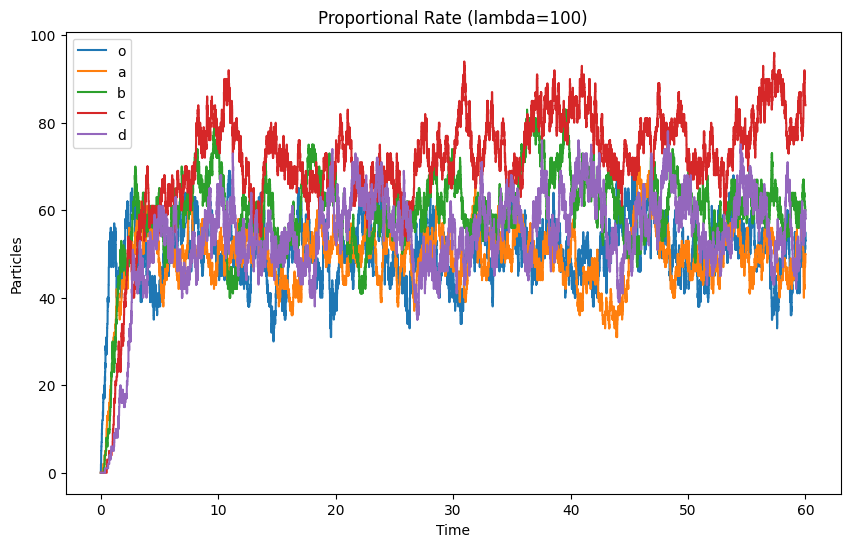

Max stability: Always stable (Infinite Server)


In [3]:
lam = 100
T_max = 60

state = np.zeros(n)
t = 0

t_hist = [0]
state_hist = [state.copy()]

while t < T_max:
    # Rate for each node is proportional to number of particles
    rates = state * w
    total_rate = lam + np.sum(rates)
    
    # Time to next event
    dt = -np.log(np.random.rand()) / total_rate
    t += dt
    
    if t > T_max:
        break
        
    # Determine event type
    # prob[0] is arrival, prob[1:] are departures from nodes
    probs = np.concatenate(([lam], rates)) / total_rate
    event = np.random.choice(n + 1, p=probs)
    
    if event == 0:
        # Arrival at 'o'
        state[0] += 1
    else:
        # Departure from node (event-1)
        src = event - 1
        state[src] -= 1
        
        # If not exiting system (node d is index 4), route it
        if src != 4:
            dest = np.random.choice(n, p=P[src])
            state[dest] += 1
            
    t_hist.append(t)
    state_hist.append(state.copy())

state_hist = np.array(state_hist)

# Plot
plt.figure(figsize=(10,6))
for i in range(n):
    plt.step(t_hist, state_hist[:, i], label=nodes[i])
plt.legend()
plt.title(f"Proportional Rate (lambda={lam})")
plt.xlabel("Time")
plt.ylabel("Particles")
plt.show()

print("Max stability: Always stable (Infinite Server)")

### Part b) Fixed Rate Simulation
Node $i$ processes particles at fixed rate $\omega_i$.

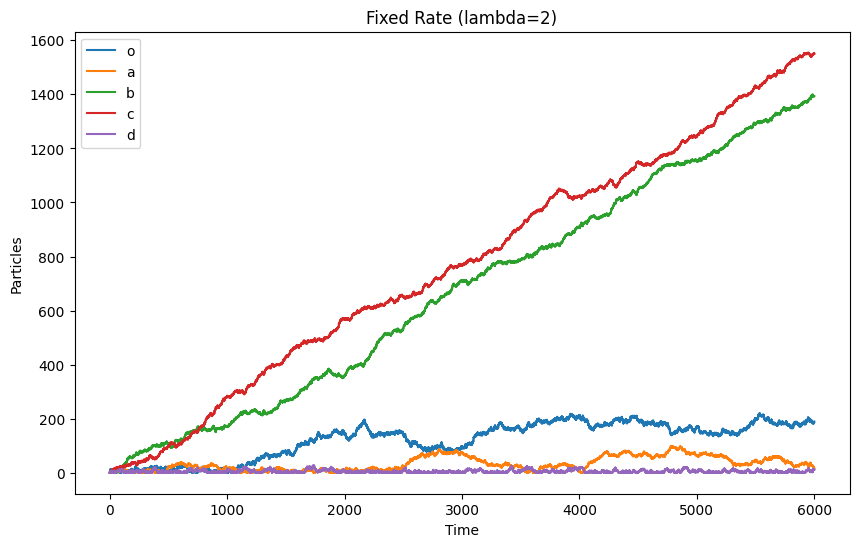

Max stability: lambda < 1.333


In [4]:
lam = 2
T_max = 6000

state = np.zeros(n)
t = 0

t_hist = [0]
state_hist = [state.copy()]

while t < T_max:
    # Rate is fixed w_i if node has particles, else 0
    rates = (state > 0) * w
    total_rate = lam + np.sum(rates)
    
    dt = -np.log(np.random.rand()) / total_rate
    t += dt
    
    if t > T_max:
        break

    probs = np.concatenate(([lam], rates)) / total_rate
    event = np.random.choice(n + 1, p=probs)
    
    if event == 0:
        state[0] += 1
    else:
        src = event - 1
        state[src] -= 1
        if src != 4:
            dest = np.random.choice(n, p=P[src])
            state[dest] += 1

    t_hist.append(t)
    state_hist.append(state.copy())

state_hist = np.array(state_hist)

plt.figure(figsize=(10,6))
for i in range(n):
    plt.step(t_hist, state_hist[:, i], label=nodes[i])
plt.legend()
plt.title(f"Fixed Rate (lambda={lam})")
plt.xlabel("Time")
plt.ylabel("Particles")
plt.show()

print("Max stability: lambda < 1.333")